In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import constant, Variable, ones_like, multiply, add, reduce_sum

In [ ]:
credit_df = pd.read_csv('../input/creditcard/default-of-credit-card-clients.csv', index_col=0)
# constant immutable
credit_constant = tf.constant(credit_df.to_numpy())

In [ ]:
credit_constant.dtype

In [ ]:
credit_constant.shape

In [ ]:
# variable mutable
A1 = tf.Variable([1,2,3,4])

In [ ]:
A1.shape

In [ ]:
B1 = A1.numpy()

In [ ]:
B1

In [ ]:
# Define tensors A1 and A23 as constants
A1 = constant([1, 2, 3, 4])
A23 = constant([[1, 2, 3], [1, 6, 4]])

In [ ]:
# Define B1 and B23 to have the correct shape
B1 = ones_like(A1)
B23 = ones_like(A23)

In [ ]:
# Perform element-wise multiplication
C1 = multiply(A1, B1)
C23 = multiply(A23, B23)

In [ ]:
print('\n C1: {}'.format(C1.numpy()))
print('\n C23: {}'.format(C23.numpy()))

In [ ]:
wealth = constant([[11, 50],[7,2], [4,60],[3,0],[25,10]])

reduce_sum(wealth, axis=1).numpy()

In [ ]:
reduce_sum(wealth, axis=0).numpy()

## Advance TF operation

In [ ]:
from tensorflow import gradients, GradientTape, reshape, random

Gradient of function $y = x^2$

In [ ]:
def compute_gradient(x0: float) -> np.float32:
  	# Define x as a variable with an initial value of x0
	x = Variable(x0)
	with GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
        # y = x**2
		y = multiply(x, x)
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

In [ ]:
# y = sin x
def compute_gradient(x0: float) -> np.float32:
  	# Define x as a variable with an initial value of x0
	x = Variable(x0)
	with GradientTape() as tape:
		tape.watch(x)
        # Define y using the multiply operation
        # y = x**2
		y = tf.math.sin(x)
    # Return the gradient of y with respect to x
	return tape.gradient(y, x).numpy()

# Compute and print gradients at x = -1, 1, and 0
print(compute_gradient(-1.0))
print(compute_gradient(1.0))
print(compute_gradient(0.0))

In [ ]:
mat = tf.random.uniform([2,2], maxval=256, dtype=tf.int32, seed=0)
mat

In [ ]:
# column vector
tf.reshape(mat, [-1,1])

In [ ]:
#  1D vector
tf.reshape(mat, [-1])

## Load data to Pandas -> NP -> TF

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

housing = pd.read_csv('../input/kc-housesales-data/kc_house_data.csv')

In [ ]:
housing[['price', 'waterfront']].head()

In [ ]:
# As Numpy
price = np.array(housing['price'], np.float32)
price

In [ ]:
# As TF
waterfront = tf.cast(housing['waterfront'], tf.bool)
waterfront

## Loss, Loss Fn

In [ ]:
import tensorflow as tf
from tensorflow import keras

# generate data
price = tf.random.uniform([256,], minval=1000, maxval=100000, dtype=tf.float32, seed=0)
prediction = price + tf.random.normal([256,], mean=100, stddev=3, seed=0)

In [ ]:
loss = keras.losses.mse(price, prediction)
loss

In [ ]:
features = tf.constant([1., 2., 3., 4., 5.])
targets = tf.constant([ 2.,  4.,  6.,  8., 10.])

In [ ]:
def model(scalar: tf.Variable, features: tf.constant = features) -> tf.Variable:
  	return scalar * features

# Define a loss function
def loss_function(scalar: tf.Variable, features: tf.constant = features, targets: tf.constant = targets) -> tf.Variable:
	# Compute the predicted values
	predictions = model(scalar, features)
    
	# Return the mean absolute error loss
	return keras.losses.mae(targets, predictions)

In [ ]:
scalar = Variable(1.0, dtype=np.float32)

# Evaluate the loss function and print the loss
print(loss_function(scalar))

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

housing = pd.read_csv('../input/kc-housesales-data/kc_house_data.csv')

In [ ]:
housing.columns

In [ ]:
size_log = np.log10(housing[['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement']].sum(axis=1))
price_log = np.log10(housing[['price']])
bedroom = housing[['bedrooms']]

#### Univariate regression : features = size_log

In [ ]:
# Define a linear regression model
def linear_regression(intercept, slope, features = size_log):
	return intercept + features*slope

# Set loss_function() to take the variables as arguments
def loss_function(intercept, slope, features = size_log, targets = price_log):
	# Set the predicted values
	predictions = linear_regression(intercept, slope, features)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

In [ ]:
# Compute the loss for different slope and intercept values
print(loss_function(0.1, 0.1).numpy())
print(loss_function(0.1, 0.5).numpy())

In [ ]:
# initialize Variable, intercept & slope
intercept = tf.Variable(0.1)
slope = tf.Variable(0.1)

# Initialize an adam optimizer
opt = keras.optimizers.Adam(0.5)

for j in range(100):
	# Apply minimize, pass the loss function, and supply the variables
	opt.minimize(lambda: loss_function(intercept, slope), var_list=[intercept, slope])

	# Print every 10th value of the loss
	if j % 10 == 0:
		print(loss_function(intercept, slope).numpy())

In [ ]:
intercept

In [ ]:
slope

#### Multivariate regressiong : features = size_log + bedrooms

In [ ]:
# Define a linear regression model
def linear_regression(param, 
                      feature1: np.array = size_log, feature2: np.array = bedroom) -> tf.Variable:
	return param[0] + feature1*param[1] + feature2*param[2]

# Set loss_function() to take the variables as arguments
def loss_function(param, feature1: np.array = size_log, feature2: np.array = bedroom,
                  targets: np.array = price_log) -> tf.Variable:
	# Set the predicted values
	predictions = linear_regression(param)
    
    # Return the mean squared error loss
	return keras.losses.mse(targets, predictions)

In [ ]:
param = tf.Variable([0.1, 0.1, 0.1])

# Define the optimize operation
opt = keras.optimizers.Adam()

In [ ]:
for j in range(10):
    opt.minimize(lambda: loss_function(param), var_list=[param])

## Batch processing

In [ ]:
# Define the intercept and slope
intercept = tf.Variable(10.0, tf.float32)
slope = tf.Variable(0.5, tf.float32)

# Define the model
def linear_regression(intercept, slope, features):
	# Define the predicted values
	return intercept + features*slope

# Define the loss function
def loss_function(intercept, slope, features, targets):
	# Define the predicted values
	predictions = linear_regression(intercept, slope, features)
    
 	# Define the MSE loss
	return keras.losses.mse(targets, predictions)

In [ ]:
# Initialize adam optimizer
opt = keras.optimizers.Adam()

# Load data in batches
for batch in pd.read_csv('../input/kc-housesales-data/kc_house_data.csv', chunksize=100):
	size_batch = np.array(batch['sqft_lot'], np.float32)

	# Extract the price values for the current batch
	price_batch = np.array(batch['price'], np.float32)

	# Complete the loss, fill in the variable list, and minimize
	opt.minimize(lambda: loss_function(intercept, slope, size_batch, price_batch), var_list=[intercept, slope])

# Print trained parameters
print(intercept.numpy(), slope.numpy())

# Neural Network

## Low-level code

In [ ]:
import tensorflow as tf
from tensorflow import Variable, constant, matmul, ones
from tensorflow import keras

In [ ]:
borrow_featues = constant([[2, 2, 43]], dtype='float32')
bias1 = Variable(1.0)
weight1 = ones((3, 2), dtype='float32')
product1 = matmul(borrow_featues, weight1)
dense1 = keras.activations.sigmoid(product1 + bias1)

bias2 = Variable(1.0)
weight2 = ones((2, 1), dtype='float32')
product2 = matmul(dense1, weight2)
prediction = keras.activations.sigmoid(product2 + bias2)

In [ ]:
prediction

In [ ]:
borrow_featues = constant([[ 3.,  3., 23.],
       [ 2.,  1., 24.],
       [ 1.,  1., 49.],
       [ 1.,  1., 49.],
       [ 2.,  1., 29.]], dtype='float32')
bias1 = Variable(1.0)
weight1 = Variable(ones((borrow_featues.shape[1], 2)))
product1 = matmul(borrow_featues, weight1)
dense1 = keras.activations.sigmoid(product1 + bias1)
# weight1.shape

## High-level code

In [ ]:
dense1 = keras.layers.Dense(4, activation='sigmoid')(borrow_featues)
dense2 = keras.layers.Dense(2, activation='relu')(dense1)
prediction = keras.layers.Dense(1, activation='relu')(dense2)

In [ ]:
prediction

## Binary Classification

In [ ]:
import tensorflow as tf
import pandas as pd
from tensorflow import constant, Variable, ones_like, multiply, add, reduce_sum, keras

In [ ]:
credit_df = pd.read_csv('../input/creditcard/default-of-credit-card-clients.csv', index_col=0, header=1)c

In [ ]:
credit_df.head()

In [ ]:
default = credit_df[['default payment next month']]

In [ ]:
features = credit_df[['BILL_AMT1', 'BILL_AMT2','BILL_AMT3']]`

In [ ]:
inputs = constant(features, dtype='float32')
dense1 = keras.layers.Dense(3, activation='relu')(inputs)
dense2 = keras.layers.Dense(2, activation='relu')(dense1)
outputs = keras.layers.Dense(1, activation='sigmoid')(dense2)

In [ ]:
error = default[:5] - outputs.numpy()[:5]
print(error)

## Multi-Classification

In [ ]:
target = credit_df[['EDUCATION']]
borrower_features = credit_df.iloc[:, [1,2,4,5,6,7,8,9,10,11]]

# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

In [ ]:
target.nunique()

In [ ]:
inputs = constant(features, dtype='float32')
dense1 = keras.layers.Dense(10, activation='sigmoid')(inputs)
dense2 = keras.layers.Dense(9, activation='relu')(dense1)
outputs = keras.layers.Dense(7, activation='softmax')(dense2)

In [ ]:
outputs[:5]

## Optimizer (SGD, RMS, Adam)

Avoid local minium with low learning rate & some amount of momentum

In [ ]:
import numpy as np
from numpy import math,pi, random

from tensorflow import divide, random, ones, matmul, constant, Variable
from matplotlib import pyplot as plt

In [ ]:
def loss_function(x):
	return 4.0*math.cos(x-1)+divide(math.cos(2.0*pi*x),x)

In [ ]:
x = np.arange(0.1, 10, 0.1)
vf = np.vectorize(loss_function)
y = vf(x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set(title='loss function')
plt.show()

In [ ]:
# Different start point, some will fall in local minimum
x_1 = Variable(0.1, dtype='float32')
x_2 = Variable(6, dtype='float32')

opt_1 = keras.optimizers.SGD(learning_rate=0.01)
opt_2 = keras.optimizers.SGD(learning_rate=0.01)

In [ ]:
for i in range(1000):
    opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

In [ ]:
# x_1 local minimum
print(x_1); print(x_2)

### RMSProb add momentum to avoid local minimum

In [ ]:
# Initialize x_1 and x_2
x_1 = Variable(0.05,'float32')
x_2 = Variable(0.05,'float32')

# Define the optimization operation for opt_1 and opt_2
opt_1 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 = keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.00)

for j in range(100):
	opt_1.minimize(lambda: loss_function(x_1), var_list=[x_1])
    # Define the minimization operation for opt_2
	opt_2.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())

## Avoid local minima with random start
### Prevent Overfitting with Dropout

In [35]:
import tensorflow as tf
import pandas as pd
import numpy as np

from tensorflow import constant, Variable, ones_like, multiply, add, reduce_sum, keras, ones, matmul
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from seaborn import heatmap

In [10]:
credit_df = pd.read_csv('../input/creditcard/default-of-credit-card-clients.csv', index_col=0, header=1)

default = credit_df[['default payment next month']]
borrower_features = credit_df.drop(['default payment next month'], axis=1).astype('float32')

In [19]:
trina_features, test_features, train_targets, test_targets = train_test_split(borrower_features, default, test_size=0.2, 
                                                                            stratify=default, random_state = 0)

In [20]:
# Define the layer 1 weights
w1 = Variable(tf.random.normal([23, 7]))

# Initialize the layer 1 bias
b1 = Variable(ones([7]))

# Define the layer 2 weights
w2 = Variable(tf.random.normal([7,1]))

# Define the layer 2 bias
b2 = Variable(0.0)

In [21]:
# Define the model
def model(w1, b1, w2, b2, features = borrower_features):
	# Apply relu activation functions to layer 1
	layer1 = keras.activations.relu(matmul(features, w1) + b1)
    # Apply dropout
	dropout = keras.layers.Dropout(0.25)(layer1)
	return keras.activations.sigmoid(matmul(dropout, w2) + b2)

# Define the loss function
def loss_function(w1, b1, w2, b2, features = borrower_features, targets = default):
	predictions = model(w1, b1, w2, b2)
	# Pass targets and predictions to the cross entropy loss
	return keras.losses.binary_crossentropy(targets, predictions)

In [38]:
def confusion_matrix(default, model_predictions):
	df = pd.DataFrame(np.hstack([default, model_predictions.numpy() > 0.5]), columns = ['Actual','Predicted'])
	confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])
	heatmap(confusion_matrix, cmap="Greys", fmt="d", annot=True, cbar=False)
	plt.show()

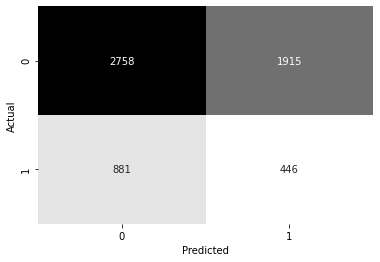

In [39]:
opt = keras.optimizers.Adam()

# Train the model
for j in range(100):
    # Complete the optimizer
	opt.minimize(lambda: loss_function(w1, b1, w2, b2), 
                 var_list=[w1, b1, w2, b2])

# Make predictions with model
model_predictions = model(w1, b1, w2, b2, test_features)

# Construct the confusion matrix
confusion_matrix(test_targets, model_predictions)

## Keras API

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [7]:
train = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
train.shape

(27455, 785)

In [12]:
train['label'].nunique()

24

In [14]:
model = keras.Sequential()
# input & first layer
model.add(keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
# hidden layer
model.add(keras.layers.Dropout(0.25))


model.add(keras.layers.Dense(48, activation='relu'))
model.add(keras.layers.Dense(24, activation='softmax'))

print(model.summary())          

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 48)                12336     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1176      
Total params: 214,472
Trainable params: 214,472
Non-trainable params: 0
_________________________________________________________________
None


In [15]:
model.compile('adam', loss='categorical_crossentropy')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 48)                12336     
_________________________________________________________________
dense_8 (Dense)              (None, 24)                1176      
Total params: 214,472
Trainable params: 214,472
Non-trainable params: 0
_________________________________________________________________
None


### Combine multiple model

In [16]:
# For model 1, pass the input layer to layer 1 and layer 1 to layer 2
m1_layer1 = keras.layers.Dense(12, activation='sigmoid')(m1_inputs)
m1_layer2 = keras.layers.Dense(4, activation='softmax')(m1_layer1)

# For model 2, pass the input layer to layer 1 and layer 1 to layer 2
m2_layer1 = keras.layers.Dense(12, activation='relu')(m2_inputs)
m2_layer2 = keras.layers.Dense(4, activation='softmax')(m2_layer1)

# Merge model outputs and define a functional model
merged = keras.layers.add([m1_layer2, m2_layer2])
model = keras.Model(inputs=[m1_inputs, m2_inputs], outputs=merged)

# Print a model summary
print(model.summary())

NameError: name 'm1_inputs' is not defined

## Train Model

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [24]:
hand = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
hand.shape

(27455, 785)

In [25]:
hand['label'].nunique()

24

In [52]:
label = oh.fit_transform(hand[['label']].to_numpy()).toarray()
features = hand.drop(['label'], axis=1).to_numpy()

In [53]:
label.shape

(27455, 24)

In [54]:
features.shape

(27455, 784)

In [55]:
model = keras.Sequential()
# input & first layer
model.add(keras.layers.Dense(256, activation='relu', input_shape=(28*28,)))
# hidden layer
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Dense(48, activation='relu'))
# output layer
model.add(keras.layers.Dense(24, activation='softmax'))

print(model.summary())          

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 48)                12336     
_________________________________________________________________
dense_21 (Dense)             (None, 24)                1176      
Total params: 214,472
Trainable params: 214,472
Non-trainable params: 0
_________________________________________________________________
None


In [56]:
model.compile('SGD', loss='categorical_crossentropy')
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 48)                12336     
_________________________________________________________________
dense_21 (Dense)             (None, 24)                1176      
Total params: 214,472
Trainable params: 214,472
Non-trainable params: 0
_________________________________________________________________
None


In [58]:
model.fit(features, label, epochs=5)

Epoch 1/5
858/858 [==============================] - 2s 2ms/step - loss: 3.1764
Epoch 2/5
858/858 [==============================] - 2s 2ms/step - loss: 3.1760
Epoch 3/5
858/858 [==============================] - 2s 2ms/step - loss: 3.1758
Epoch 4/5
858/858 [==============================] - 2s 2ms/step - loss: 3.1757
Epoch 5/5
858/858 [==============================] - 2s 3ms/step - loss: 3.1756


In [60]:
model.compile('RMSprop', loss='categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 256)               200960    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 48)                12336     
_________________________________________________________________
dense_21 (Dense)             (None, 24)                1176      
Total params: 214,472
Trainable params: 214,472
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(features, label, epochs=5, validation_split=0.1)

Epoch 1/5
773/773 [==============================] - 3s 4ms/step - loss: 3.1749 - accuracy: 0.0473 - val_loss: 3.1771 - val_accuracy: 0.0477
Epoch 2/5
773/773 [==============================] - 2s 3ms/step - loss: 3.1758 - accuracy: 0.0476 - val_loss: 3.1775 - val_accuracy: 0.0477
Epoch 3/5
773/773 [==============================] - 2s 3ms/step - loss: 3.1754 - accuracy: 0.0475 - val_loss: 3.1775 - val_accuracy: 0.0477
Epoch 4/5
773/773 [==============================] - 2s 3ms/step - loss: 3.1754 - accuracy: 0.0500 - val_loss: 3.1780 - val_accuracy: 0.0499
Epoch 5/5
773/773 [==============================] - 2s 3ms/step - loss: 3.1755 - accuracy: 0.0476 - val_loss: 3.1778 - val_accuracy: 0.0477


# Keras 2.0, Estimator API

In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()

In [62]:
housing = pd.read_csv('../input/kc-housesales-data/kc_house_data.csv')
housing.shape

(21597, 21)

In [65]:
housing.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [66]:
# Define feature columns for bedrooms and bathrooms
bedrooms = tf.feature_column.numeric_column("bedrooms")
bathrooms = tf.feature_column.numeric_column('bathrooms')

# Define the list of feature columns
feature_list = [bedrooms, bathrooms]

def input_fn():
	# Define the labels
	labels = np.array(housing['price'])
	# Define the features
	features = {'bedrooms':np.array(housing['bedrooms']), 
                'bathrooms':np.array(housing['bathrooms'])}
	return features, labels

In [69]:
model = tf.estimator.DNNRegressor(feature_columns=feature_list, hidden_units=(2,2))

In [71]:
model.train(input_fn, steps=1)